# Descomposición

In [3]:
import pandas as pd
from pandas import Series
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
#from pydataset import data
#data('AirPassengers')
#Usamos Pandas para manejar las bases de Datos

#data = pd.read_csv('AirPassengers.csv')
data=pd.read_csv('/Users/FAMILIA MORENO/Documents/FMpy/AirPassengers.csv')
print(data)
print('\n Data Types:')
print(data.dtypes)

       Month  NPassengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
5    1949-06          135
6    1949-07          148
7    1949-08          148
8    1949-09          136
9    1949-10          119
10   1949-11          104
11   1949-12          118
12   1950-01          115
13   1950-02          126
14   1950-03          141
15   1950-04          135
16   1950-05          125
17   1950-06          149
18   1950-07          170
19   1950-08          170
20   1950-09          158
21   1950-10          133
22   1950-11          114
23   1950-12          140
24   1951-01          145
25   1951-02          150
26   1951-03          178
27   1951-04          163
28   1951-05          172
29   1951-06          178
..       ...          ...
114  1958-07          491
115  1958-08          505
116  1958-09          404
117  1958-10          359
118  1958-11          310
119  1958-12          337
120  1959-01

* **Convertir el conjunto de datos en una serie de Tiempo**

In [4]:
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
##data.set_index('Month', inplace=True)
pasajeros=data.set_index('Month')
#check datatype of index

#convert to time series:
ts = pasajeros['NPassengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: NPassengers, dtype: int64

* **Graficar la Serie**

Text(0.5, 1.0, 'AirPassengers')

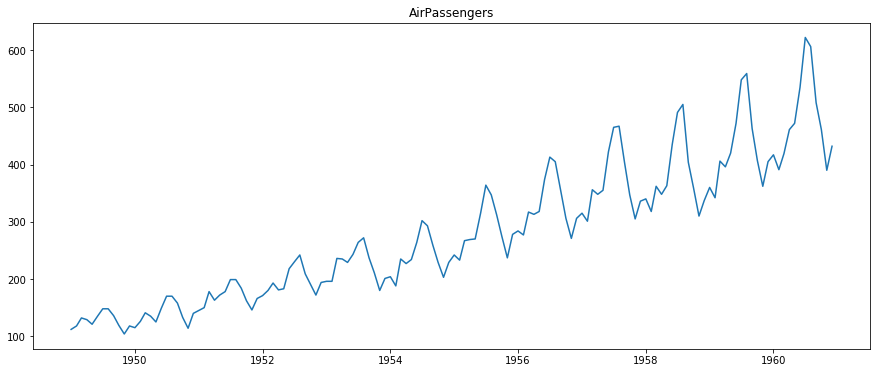

In [5]:
plt.plot(ts)
plt.title('AirPassengers') 

* **Tranformación Box-Cox**

(array([ 6.8274885 ,  6.93282065,  7.16188982,  7.11460912,  6.98378526,
        7.20826372,  7.39959616,  7.39959616,  7.22352663,  6.94993029,
        6.67929963,  6.93282065,  6.88073991,  7.06638216,  7.29843673,
        7.20826372,  7.05008902,  7.41371306,  7.69297564,  7.69297564,
        7.53725821,  7.17744667,  6.86312233,  7.28363782,  7.35675232,
        7.42774947,  7.79166105,  7.60332493,  7.71801202,  7.79166105,
        8.03379751,  8.03379751,  7.86322452,  7.59025107,  7.37111683,
        7.64214063,  7.70552501,  7.81574089,  7.96692809,  7.82769544,
        7.85143669,  8.23478308,  8.35415575,  8.46833511,  8.14152234,
        7.94424449,  7.71801202,  7.97819488,  8.00058081,  8.00058081,
        8.4118638 ,  8.40233325,  8.34441333,  8.47763077,  8.66568382,
        8.73398047,  8.42136   ,  8.16253854,  7.81574089,  8.05570573,
        8.08822236,  7.9098367 ,  8.40233325,  8.32481925,  8.39276809,
        8.66568382,  8.97573447,  8.90544123,  8.62209761,  8.3

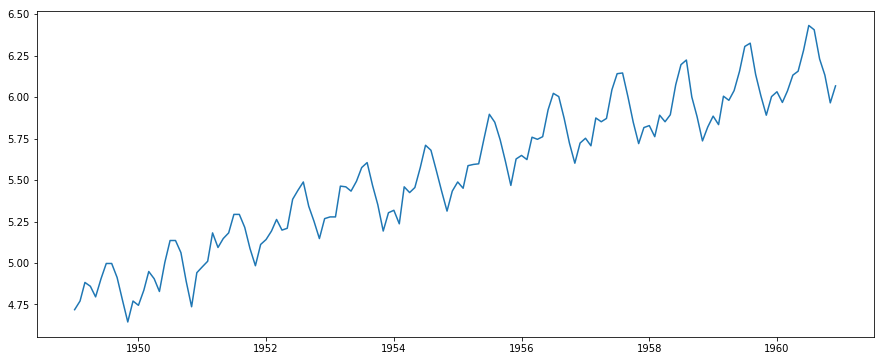

In [6]:
import scipy.stats ####En ocasiones puede funcionar la línea 46 sin ésta línea.
sp.stats.boxcox(ts,alpha=0.05)
print(sp.stats.boxcox(data['NPassengers'],alpha=0.05))
logAirp=sp.stats.boxcox(data['NPassengers'],lmbda=0)
data = data.assign(logAirp=logAirp)   

logpasajeros=data.set_index('Month')   
logAirPass=  logpasajeros['logAirp'] 
plt.plot(logAirPass)

* **Descomposición usando filtros**

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    4.837280
1949-08-01    4.841114
1949-09-01    4.846596
1949-10-01    4.851238
1949-11-01    4.854488
1949-12-01    4.859954
1950-01-01    4.869840
1950-02-01    4.881389
1950-03-01    4.893411
1950-04-01    4.904293
1950-05-01    4.912752
1950-06-01    4.923701
1950-07-01    4.940483
1950-08-01    4.957406
1950-09-01    4.974380
1950-10-01    4.991942
1950-11-01    5.013095
1950-12-01    5.033804
1951-01-01    5.047776
1951-02-01    5.060902
1951-03-01    5.073812
1951-04-01    5.088378
1951-05-01    5.106906
1951-06-01    5.124312
                ...   
1958-07-01    5.932964
1958-08-01    5.938377
1958-09-01    5.946188
1958-10-01    5.956352
1958-11-01    5.967813
1958-12-01    5.977291
1959-01-01    5.985269
1959-02-01    5.994078
1959-03-01    6.003991
1959-04-01    6.014899
1959-05-01    6.026589
1959-06-01    6.040709
1959-

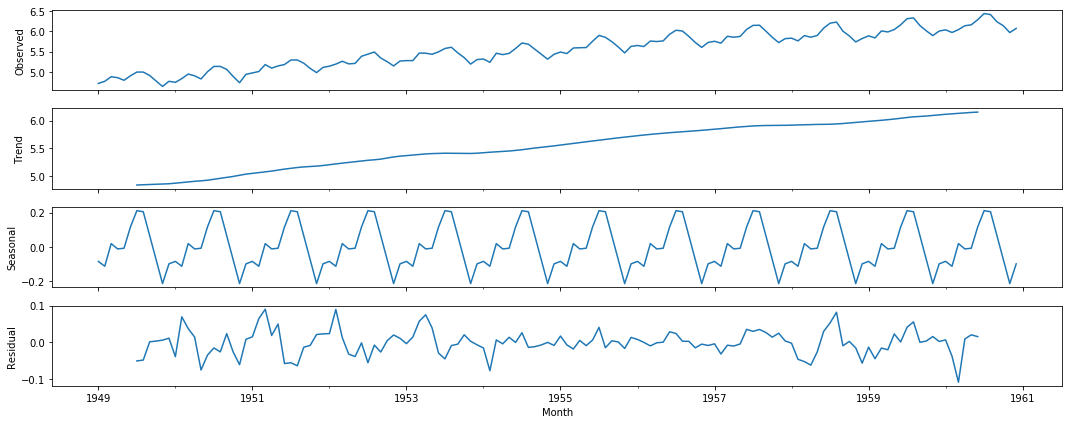

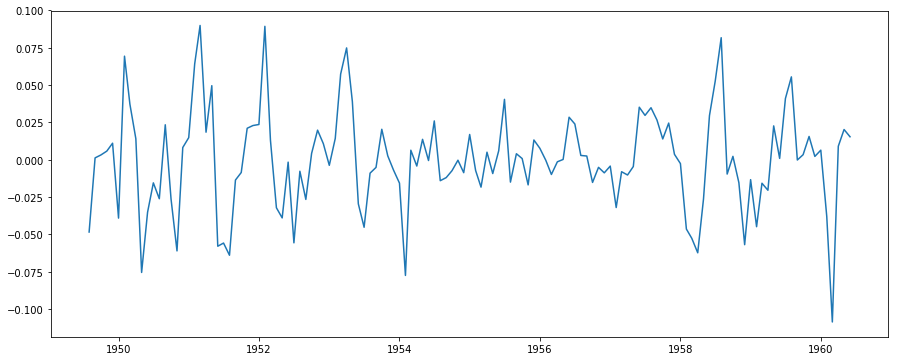

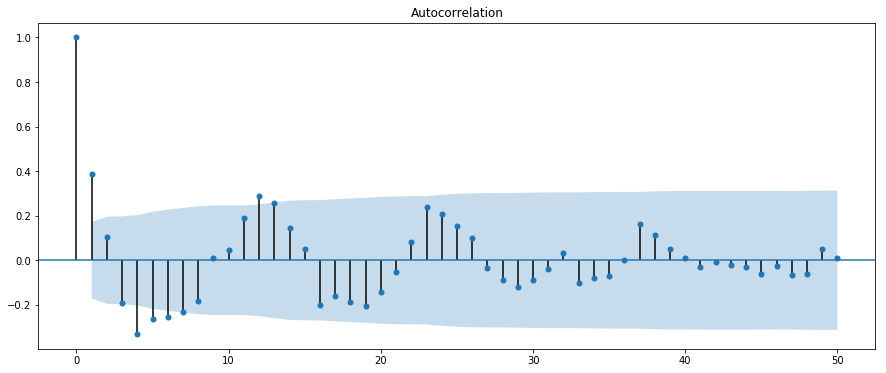

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result = seasonal_decompose(logAirPass, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)
result.plot()
pyplot.show()
import statsmodels as sm
import statsmodels.api as smapi
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
residu=pd.Series(result.resid)
resi=pd.Series(residu[7:138,]) # remover los NaN
plt.plot(resi)
acf(resi, nlags=50,unbiased=False)
A=plot_acf(resi,lags=50,unbiased=False, alpha=0.05)

* **Holt-Winters**

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
             ... 
1958-07-01    491
1958-08-01    505
1958-09-01    404
1958-10-01    359
1958-11-01    310
1958-12-01    337
1959-01-01    360
1959-02-01    342
1959-03-01    406
1959-04-01    396
1959-05-01    420
1959-06-01    472
1959-07-01    548
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960

C:\Users\FAMILIA MORENO\Documents\AANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


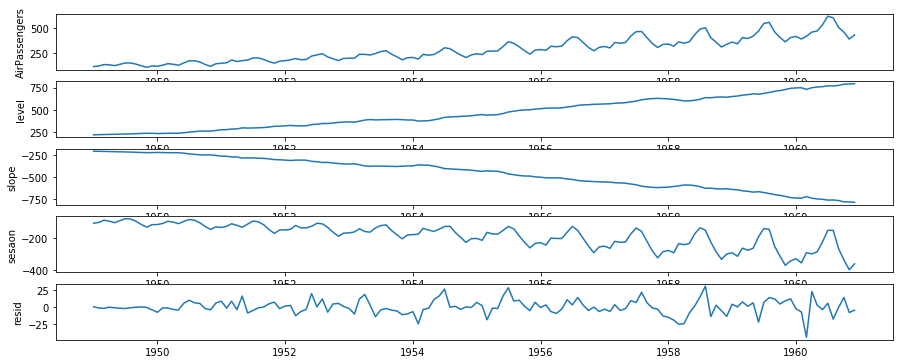

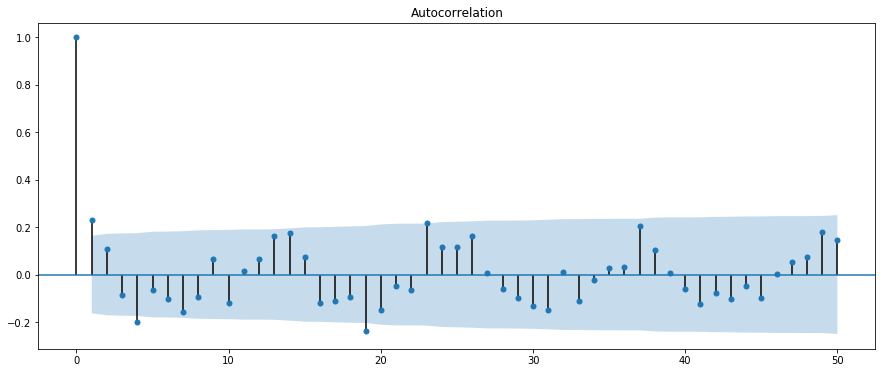

In [18]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
print(ts)
print(pd.infer_freq(data['Month'], warn=True))
fit1 = ExponentialSmoothing(ts, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
####ejecutar desde la línea 74 hasta la 88
plt.subplot(5, 1, 1)
plt.plot(ts)
plt.ylabel('AirPassengers') 
plt.subplot(5, 1, 2)
plt.plot(fit1.level)
plt.ylabel('level') 
plt.subplot(5, 1, 3)
plt.plot(fit1.slope)
plt.ylabel('slope') 
plt.subplot(5, 1, 4)
plt.plot(fit1.season)
plt.ylabel('sesaon') 
plt.subplot(5, 1, 5)
plt.plot(fit1.resid)
plt.ylabel('resid') 
pyplot.show()
### Componente estacionaria
Yt = fit1.resid
acf(Yt, nlags=50,unbiased=False )
Res=plot_acf(Yt,lags=50,unbiased=False, alpha=0.05)

* **Aplicado diferenciación**

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01         NaN
1950-01-01         NaN
1950-02-01    0.039164
1950-03-01    0.000361
1950-04-01   -0.020496
1950-05-01   -0.012939
1950-06-01    0.066148
1950-07-01    0.039915
1950-08-01    0.000000
1950-09-01    0.011354
1950-10-01   -0.038715
1950-11-01   -0.019418
1950-12-01    0.079150
1951-01-01    0.060844
1951-02-01   -0.057448
1951-03-01    0.058670
1951-04-01   -0.044548
1951-05-01    0.130705
1951-06-01   -0.141343
                ...   
1958-07-01    0.024066
1958-08-01    0.023822
1958-09-01   -0.078229
1958-10-01    0.033998
1958-11-01   -0.017737
1958-12-01   -0.013289
1959-01-01    0.054187
1959-02-01    0.015601
1959-03-01    0.041950
1959-04-01    0.014503
1959-05-01    0.016640
1959-06-01   -0.064219
1959-

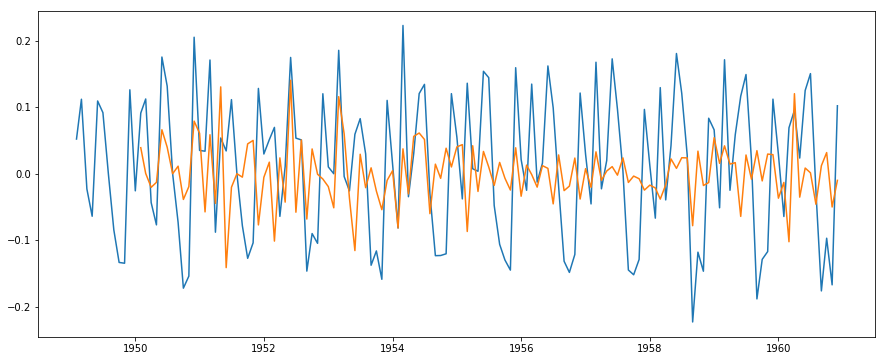

In [9]:
diff1logAirPass=logAirPass.diff(periods=1)####Diferencia Ordinaria (remueve la componente de tendencia)
plt.plot(diff1logAirPass)
diffs1diff1logAirPass=diff1logAirPass.diff(periods=12) ###Diferencia Estacional (remueve la componente estacional)
print(diffs1diff1logAirPass)
plt.plot(diffs1diff1logAirPass)